# 과제3. 직원 이직 분석

* 여러분은 OO회사의 **데이터분석가** 입니다.
* **인사팀**에서는 여러분에게 우리 회사 직원의 **이직(Attrition)에 영향을 주는 요인**을 분석해달라고 요청해 왔습니다.

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [125]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

* 분석 단위 : 직원 한사람, 한사람...
* 설명에서 언급되어지지 않은 사항은 직접 고민하며 스스로 정해서 진행하시면 됩니다.^^
* 자\~! 이제 시작해 봅시다\~!

----

## 1.가설수립

* 여기서는 가설을 간략히 수립합니다.
    * 숫자형, 범주형 각각 최소 3개 이상씩, 전체 6개 이상의 변수를 도출, 가설을 수립하시오.

- <범주형 vs 범주형>

* 가설1 : 결혼을 하면 책임감이 필요로 하기 때문에, MaritalStatus(결혼상태)가 Married면 Attrition(이직여부)가 낮을 것이다.

* 가설2 : RelationshipSatisfaction(동료와의 관계)가 좋을 수록 Attrition(이직여부)가 낮을 것이다.

* 가설3 : WorkLifeBalance(워라밸. 일-삶 균형도)가 좋을 수록 Attrition(이직여부)가 낮을 것이다.

* 가설9 : OverTime(야근여부)가 있을 수록 Attrition(이직여부)가 높을 것이다.

- <숫자형 vs 범주형>

* 가설4 : DistanceFromHome(집-직장 거리)가 가까울 수록 Attrition(이직여부)가 낮을 것이다.

* 가설5 : NumCompaniesWorked(입사 전 근무한 회사 수)가 높을 수록 Attrition(이직여부)가 높을 것이다.

* 가설6 : PercentSalaryHike(전년대비 급여인상율)이 높을 수록  Attrition(이직여부)가 낮을 것이다.

* 가설7 : TotalWorkingYears(총 경력 연수)이 높을 수록 Attrition(이직여부)가 낮을 것이다.

* 가설8 : MonthlyIncome(월급)이 높을 수록 Attrition(이직여부)가 낮고 강한 관계가 있을 것이다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) target : Attrition(이직여부)

In [126]:
target = 'Attrition'

① 변수의 비즈니스 의미

> 이직여부  
Yes 1- 이직  
No 0- 잔류

② 숫자, 범주?

> 범주

③ NaN 존재 유무

In [127]:
data[target].isna().sum()

0

④ 기초통계량(수치화)

In [128]:
print(data[target].value_counts())
print()
print(data[target].value_counts()/ len(data[target]))

0    1050
1     200
Name: Attrition, dtype: int64

0    0.84
1    0.16
Name: Attrition, dtype: float64


⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


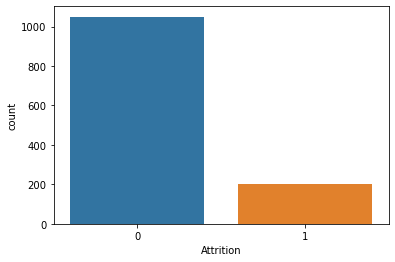

In [129]:
sns.countplot(data[target])
plt.show()

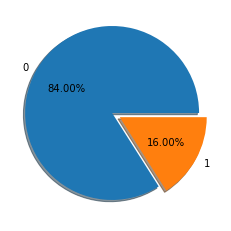

In [130]:
# 집계
cnt = data[target].value_counts()

# pie chart
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
       explode = [0.05, 0.05], shadow=True)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 이직을 하지 않은 직원이 84%로 이직을 한 직원보다 많다.  
> 전반적으로 회사에 만족하는 직원들이 많을 것으로 예상되고 분석결과도 그렇지 않을까?

7) 추가 분석해 볼 사항이 있나요?

> 이직률이 0퍼 일 수는 없으나, 이직이 높은 이유와 낮은 이유를 추가로 살펴보고 현재 회사에서 진행중인 인사프로그램의 장점을 정리해서 유지할 필요가 있어보인다.

> 지금 직원 이직이 낮다고 회사 시스템을 방치하기 보다는 이직을 낮추기 위해 노력을 기울이는 긴장도 늦추지 않아야 할 필요가 있다.

### 2) feature1 : MaritalStatus(결혼상태)

In [131]:
feature = 'MaritalStatus'

① 변수의 비즈니스 의미

> 결혼상태: Single, Married, Divorced

② 숫자, 범주?

> 범주

③ NaN 존재 유무

In [132]:
data[feature].isna().sum()

0

④ 기초통계량(수치화)

In [133]:
print(data[feature].value_counts())
print()
print(data[feature].value_counts()/ len(data[feature]))

Married     570
Single      404
Divorced    276
Name: MaritalStatus, dtype: int64

Married     0.4560
Single      0.3232
Divorced    0.2208
Name: MaritalStatus, dtype: float64


⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


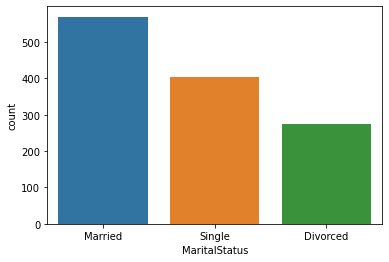

In [134]:
sns.countplot(data[feature])
plt.show()

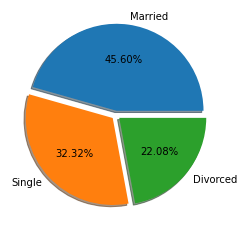

In [135]:
# 집계
cnt = data[feature].value_counts()

# pie chart
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
       explode = [0.05, 0.05, 0.05], shadow=True)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 결혼한 사람이 이직이 낮다고 생각했는데, 싱글인 사람의 비율도 32.32%로 작지 않다.

> 회사의 사내 복지가 엄청 좋은 것으로 예상된다.

⑦ 추가 분석해 볼 사항이 있나요?

> 추후에 분석을 하면서 혹시 Single과 Divorced 를 합쳐서 분석해야할 필요가 있을까? 어찌되었든 현재는 싱글이니까?

### 3) feature2 : RelationshipSatisfaction(동료와의 관계)

In [136]:
feature = 'RelationshipSatisfaction'

① 변수의 비즈니스 의미

> 동료와의 관계: 1 Low, 2 Medium, 3 High, 4 Very High

② 숫자, 범주?

> 범주

③ NaN 존재 유무

In [137]:
data[feature].isna().sum()

0

④ 기초통계량(수치화)

In [138]:
print(data[feature].value_counts())
print()
print(data[feature].value_counts()/ len(data[feature]))

3    397
4    365
2    258
1    230
Name: RelationshipSatisfaction, dtype: int64

3    0.3176
4    0.2920
2    0.2064
1    0.1840
Name: RelationshipSatisfaction, dtype: float64


⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


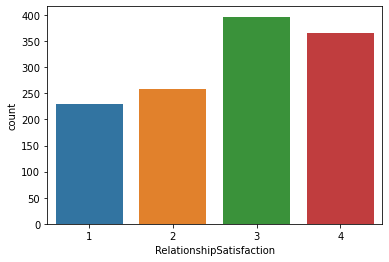

In [139]:
sns.countplot(data[feature])
plt.show()

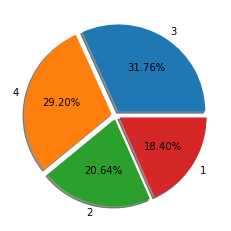

In [140]:
# 집계
cnt = data[feature].value_counts()

# pie chart
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
       explode = [0.05, 0.05, 0.05, 0.05], shadow=True)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 동료와의 관계에서 3(High)와 4(Very High)를 살펴보니, 60% 정도의 직원이 동료와의 관계가 높은편이다. 즉, 동료들과 잘지내고 있는 직원이 60%정도 이고, 보통인 사람은 비즈니스 관계로만 생각하지 않을까?

> 동료와의 관계 비율이 18.4%로 가장 낮은 것을 보니, 현재 분석하는 회사의 직원들은 팀워크가 좋아보이고 그렇기 때문에 성과가 좋고 이에 합당한 보상도 제대로 받고 있는 것이 아닐까?

⑦ 추가 분석해 볼 사항이 있나요?

> 동료와이 관계가 높을 수록 팀워크가 좋을테니 급여 인상율도 높지 않을까?

### 4) feature3 : WorkLifeBalance(워라밸. 일-삶 균형도)

In [141]:
feature = 'WorkLifeBalance'

① 변수의 비즈니스 의미

> 워라밸. 일-삶 균형도: 1 Bad, 2 Good, 3 Better, 4 Best

② 숫자, 범주?

> 범주

③ NaN 존재 유무

In [142]:
data[feature].isna().sum()

0

④ 기초통계량(수치화)

In [143]:
print(data[feature].value_counts())
print()
print(data[feature].value_counts()/ len(data[feature]))

3    747
2    297
4    137
1     69
Name: WorkLifeBalance, dtype: int64

3    0.5976
2    0.2376
4    0.1096
1    0.0552
Name: WorkLifeBalance, dtype: float64


⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


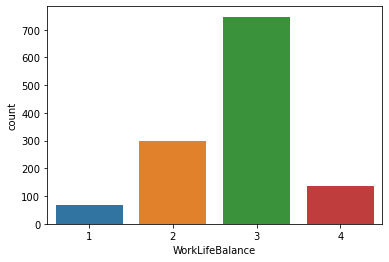

In [144]:
sns.countplot(data[feature])
plt.show()

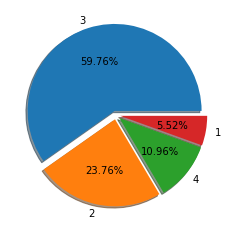

In [145]:
# 집계
cnt = data[feature].value_counts()

# pie chart
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
       explode = [0.05, 0.05, 0.05, 0.05], shadow=True)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 그래프를 살펴보니,  WorkLifeBalance(워라밸. 일-삶 균형도)에서 만족하는 직원이 상당히 많은 것을 시각적으로 확인할 수 있다.

> 동료와의 관계가 좋은 편으로 나왔는데, 워라밸까지 만족하는 설문지 결과를 보면 이 회사에서 이직을 하는 사람들은 결혼이나 특별한 일이 아니고서는 이직을 잘 하지 않지 않을까?

⑦ 추가 분석해 볼 사항이 있나요?

> WorkLifeBalance(워라밸. 일-삶 균형도)과 DistanceFromHome(집-직장 거리)는 관련이 있을까? 집이 가까우면 출퇴근 시간이 줄어들기 때문에, 직원일이 만족하는 것일까? 회사에서 제공하는 사원아파트가 있는 것일까?

### 5) feature4 : DistanceFromHome(집-직장 거리)

In [146]:
feature = 'DistanceFromHome'

① 변수의 비즈니스 의미

> 집-직장 거리(단위: 마일)

② 숫자, 범주?

> 숫자

③ NaN 존재 유무

In [147]:
data[feature].isna().sum()

54

> 결측치 존재

④ 기초통계량(수치화)

In [148]:
data[feature].describe()

count    1196.000000
mean        9.258361
std         8.166016
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

> 결측치를 확인하고 기초통계량을 확인 한 결과,  
> 거리에 대한 것이니 마이너스가 없는 것을 확인했다.

> 결측치를 어떻게 할까 고민을 하면서,  
> 한 행은 직원 한 명 한 명의 유니크한 정보인데 다른 사람의 값으로 채워 넣어도 될까?   
회사 주변에 사는 직원들도 있지만, 회사에서 멀리사는 직원들도 분명히 존재할 꺼다

> 하지만, 지원들은 분명 출퇴근 시간이 그래도 1~2시간 이내인 곳에서 거주 할 것이다.  
> 회사가 3시간 이상으로 너무 멀었으면 이사를 가거나 했을 것이기 때문에 평균값으로 결측치를 채워보겠다.

- 평균 값으로 결측치 채우기

In [149]:
avg = data[feature].mean()
avg

9.258361204013378

In [150]:
data[feature].fillna(avg, inplace=True) 

In [151]:
data[feature].isna().sum()

0

> 평균 값으로 결측치 대체하기 완료!

In [152]:
# 기초통계량 확인!
data[feature].describe()

count    1250.000000
mean        9.258361
std         7.987539
min         1.000000
25%         2.000000
50%         7.000000
75%        13.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

⑤ 분포 확인(시각화)

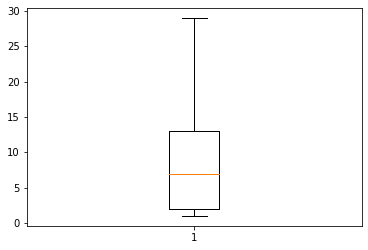

1.0 29.0


In [153]:
box = plt.boxplot(data[feature])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

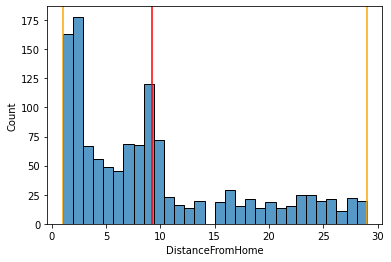

In [154]:
mean = data[feature].mean()

sns.histplot(data[feature], bins = 30)

plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

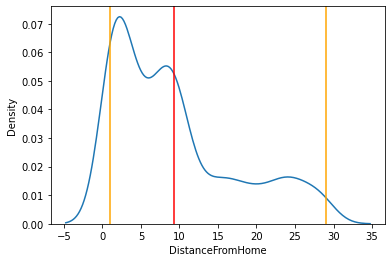

In [155]:
sns.kdeplot(data = data, x = feature)
plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 회사와의 거리가 2마일 이하에 집이 있는 직원수가 가장 많고 15마일 이상인 직원들도 있다. 
> - 내가 직원 입장이라면, 회사와 집이 가까운 것을 매우 선호할 것이다. 다른 사람들도 그렇지 않을까? 라고 생각을 했고 그래프를 살펴보니 집과 회사까지의 거리가 10마일 이내인 직원들의 수가 많다. 혹시 회사에서 제공하는 집이있는 것일까?

⑦ 추가 분석해 볼 사항이 있나요?

> - 크게 3개의 집단으로 나눌수 있어 보인다. 5마일을 기준으로 분류하고 15마일 이상으로 분류한다.

### 6) feature5 : NumCompaniesWorked(입사 전 근무한 회사 수)

In [156]:
feature = 'NumCompaniesWorked'

① 변수의 비즈니스 의미

> 입사 전 근무한 회사 수, 0 - 우리회사가 첫 직장

② 숫자, 범주?

> 숫자

③ NaN 존재 유무

In [157]:
data[feature].isna().sum()

21

> 결측치 존재

④ 기초통계량(수치화)

In [158]:
data[feature].describe()

count    1229.000000
mean        2.678600
std         2.473647
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

> 응답을 안하고 공란으로 둔 것으로 보면, 체크 하는 것을 깜빡했거나, 아니면 말하기 싫어서 2가지라고 생각한다.

> 특히, 신입사원으로 여기가 첫 회사이면 설문조사 후에 공란이 없는지 한 번 더 확인 하지 않을까?

> 공란으로 둔 직원들은 우리회사가 첫 직장이 아니고 적어도 2번째 이상의 직장이지 않을까?

> 결측치를 적어도 2번째 회사이지 않을까라는 생각으로 0을 넣을 수는 없고 1이상으로 넣고 싶지만 현재 근무하는 회사가 몇 번째 회사인지 알 수가 없다.

> 결론, 현재 근무하는 회사가 첫 회사가 아니라고 판단했고  
> 적어도 다른회사에서 1번 이상 일한 경험이 있을 것이라 추측 되기 때문에  
> 결측치를 1로 주겠다!

- 1로 결측치 채우기

In [159]:
data[feature].fillna(1, inplace=True) 

In [160]:
data[feature].isna().sum()

0

> 1로 결측치 대체하기 완료!

In [161]:
# 기초통계량 확인!
data[feature].describe()

count    1250.000000
mean        2.650400
std         2.462241
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

⑤ 분포 확인(시각화)

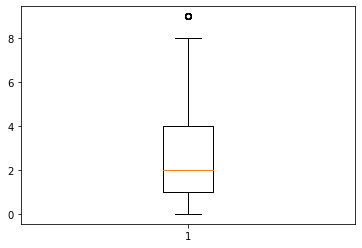

0.0 8.0


In [162]:
box = plt.boxplot(data[feature])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

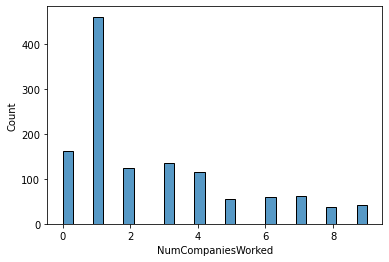

In [163]:
mean = data[feature].mean()

sns.histplot(data[feature], bins = 30)
plt.show()

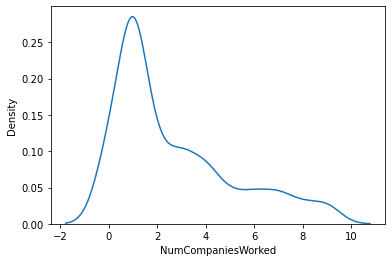

In [164]:
sns.kdeplot(data = data, x = feature)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> box plot에서 이상치가 탐색되었는데, 혹시 계약직은 아닐까? 프로젝트를 할때 하번씩 외부 전문가를 데리고 오는데 그 사람이 아닐까?

⑦ 추가 분석해 볼 사항이 있나요?

> 21명을 1로 바꿨다고 해서, 입사전 근무한 회사 수가 1개인 직원이 400명 이상은 아니다. 결측치 처리 전에도 입사전 근무한 회사 수가 1인 직원이 많지 않았나?

> 입사전 근무한 회사 수가 낮을 수록 이직여부가 낮지 않을까?

### 7) feature6 : PercentSalaryHike(전년대비 급여인상율)

In [165]:
feature = 'PercentSalaryHike'

① 변수의 비즈니스 의미

> 전년대비 급여인상율 (%)

② 숫자, 범주?

> 숫자

③ NaN 존재 유무

In [166]:
data[feature].isna().sum()

0

> 결측치 존재

④ 기초통계량(수치화)

In [167]:
data[feature].describe()

count    1250.000000
mean       15.216000
std         3.625556
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

⑤ 분포 확인(시각화)

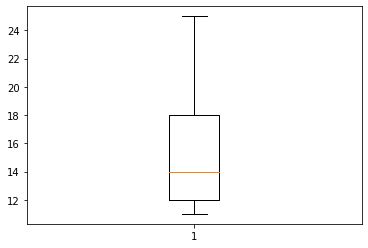

11.0 25.0


In [168]:
box = plt.boxplot(data[feature])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

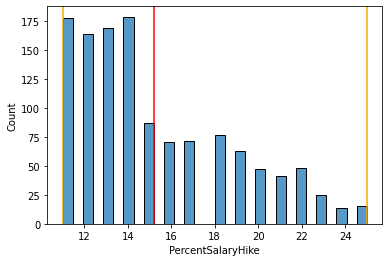

In [169]:
mean = data[feature].mean()

sns.histplot(data[feature], bins = 30)

plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

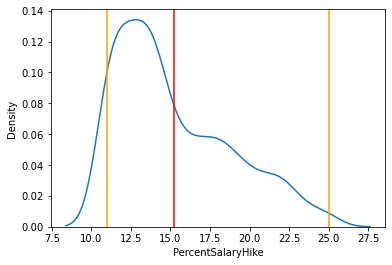

In [170]:
sns.kdeplot(data = data, x = feature)
plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 전년대비 급여인상율은 15% 이하가 가장 높게 나타난 것으로 보아, 직원의 대부분은 급여인상율 혜택을 받고 있는 것이 아닐까?

⑦ 추가 분석해 볼 사항이 있나요?

> 전년대비 급여인상율이 높을 수록 월급이 높을까?

### 7) feature7 : TotalWorkingYears(총 경력 연수)

In [171]:
feature = 'TotalWorkingYears'

① 변수의 비즈니스 의미

> 총 경력 연수

② 숫자, 범주?

> 숫자

③ NaN 존재 유무

In [172]:
data[feature].isna().sum()

0

④ 기초통계량(수치화)

In [173]:
data[feature].describe()

count    1250.00000
mean       11.33920
std         7.79687
min         0.00000
25%         6.00000
50%        10.00000
75%        15.00000
max        40.00000
Name: TotalWorkingYears, dtype: float64

⑤ 분포 확인(시각화)

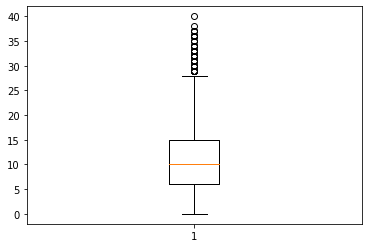

0.0 28.0


In [174]:
box = plt.boxplot(data[feature])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

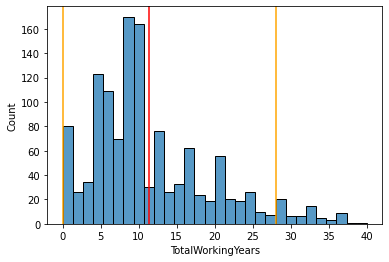

In [175]:
mean = data[feature].mean()

sns.histplot(data[feature], bins = 30)

plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

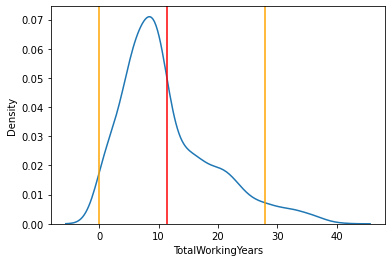

In [176]:
sns.kdeplot(data = data, x = feature)
plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 신입사원이 80명 정도 이다.  
> - box plot에서 이상치로 있는 직원들은 총 경력이 약 30년 이상인 배태랑 직원들이 아닐까?
> - 총 경력 연수가 7~10년인 직원들이 가장 많음 
> - 10년 이후로 부터 그래프가 급격하게 떨어지는 이유는 무엇일까? 10년 이상의 경력직들은 회사 안에서 통과해야할 시험이라도 있는 것일까? 그 시험을 통과하지 못하면 회사를 나가야하나? 데이터에서 살펴볼 수 없는 사내의 문화 및 분위기를 알아야 더 정확한 분석이 가능해 보인다.

⑦ 추가 분석해 볼 사항이 있나요?

> TotalWorkingYears(총 경력 연수)가 높은 직원들은 이직여부가 낮은편이 아닐까? 10이상을 기준으로 두 그룹으로 나누어 자세히 살펴볼 필요가 있다.

### 9) feature8 : MonthlyIncome(월급)

In [177]:
feature = 'MonthlyIncome'

① 변수의 비즈니스 의미

> 월급(달러)

② 숫자, 범주?

> 숫자

③ NaN 존재 유무

In [178]:
data[feature].isna().sum()

0

④ 기초통계량(수치화)

In [179]:
data[feature].describe()

count     1250.000000
mean      6525.548000
std       4676.979554
min       1009.000000
25%       2932.250000
50%       4988.000000
75%       8437.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64

⑤ 분포 확인(시각화)

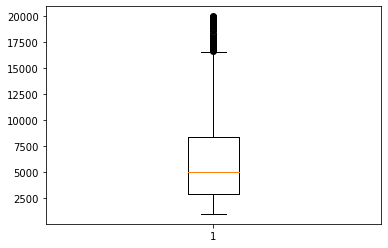

1009.0 16606.0


In [180]:
box = plt.boxplot(data[feature])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

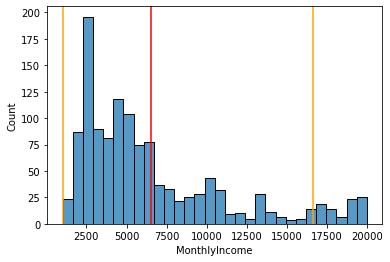

In [181]:
mean = data[feature].mean()

sns.histplot(data[feature], bins = 30)

plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

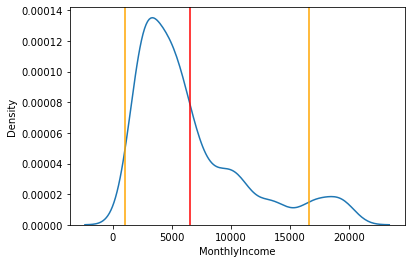

In [182]:
sns.kdeplot(data = data, x = feature)
plt.axvline(l_fence, color = 'orange')
plt.axvline(mean, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> box plot을 보니 연봉이 높은 직원들이 이상치로 들어가 있다.

> 평균 월급인 6525달러 지점에서의 수가 확연하게 줄어드는 것으로 보아, 이 회사는 경력직보다 신입사원수가 많고 경력직으 이직이 높은것이 아닐까?

⑦ 추가 분석해 볼 사항이 있나요?

> 신입사원과, 경력직 2가지 그룹으로 나누어 이직여부를 살펴볼 필요가 있다.

### 10) feature9 : OverTime(야근여부)

In [219]:
feature = 'OverTime'

① 변수의 비즈니스 의미

> 야근여부 (Yes, No)

② 숫자, 범주?

In [220]:
data[feature].unique()

array(['No', 'Yes'], dtype=object)

> 범주

③ NaN 존재 유무

In [221]:
data[feature].isna().sum()

0

④ 기초통계량(수치화)

In [222]:
print(data[feature].value_counts())
print()
print(data[feature].value_counts()/ len(data[feature]))

No     896
Yes    354
Name: OverTime, dtype: int64

No     0.7168
Yes    0.2832
Name: OverTime, dtype: float64


⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


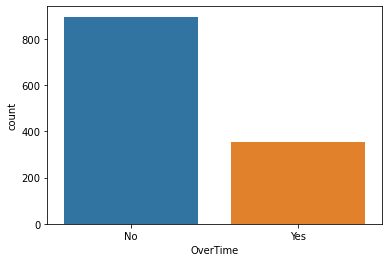

In [223]:
sns.countplot(data[feature])
plt.show()

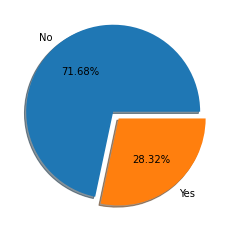

In [225]:
# 집계
cnt = data[feature].value_counts()

# pie chart
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
       explode = [0.05, 0.05], shadow=True)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 그래프를 살펴보니, 야근을 하지 않은 직원들이 71.68%로 야근을 하지 않는 직원보다 압도록으로 많다.

> 야근을 많이 하지 않으면 워라밸이 좋고 개인적으로 자기 개발을 하는 시간이 늘어나기 때문에 이직여부가 낮지 않을까? 그래도 월급이 너무 적으면 이직을 할 꺼 같은데 월급도 많이 주는 최고의 회사인가?

⑦ 추가 분석해 볼 사항이 있나요?

> 야근이 적은 회사인데 실질적인 수치로만 야근이 적다고 표시하고 집에가서 직원들이 다들 일하는 것일까? 아니면 정말 야근이 없고 집에서는 푹 쉴수 있게 운영하는 회사일까? 현직자의 말을 참고할 필요가 있다. 그래야 주어진 데이터를 가지고 분석하는 것이 의미가 있기 때문이다.

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [183]:
target = 'Attrition'

### (1) 범주형 Feature --> 범주형 Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) MaritalStatus(결혼상태 범주) --> Attrition(이직여부)

In [184]:
feature = 'MaritalStatus'

① 교차표(pd.crosstab())

In [185]:
temp = pd.crosstab(data[target], data[feature], normalize = 'columns')
temp

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,0.916667,0.878947,0.732673
1,0.083333,0.121053,0.267327


② 시각화( Stacked Bar, Mosaic)

Attrition             0         1
MaritalStatus                    
Divorced       0.916667  0.083333
Married        0.878947  0.121053
Single         0.732673  0.267327


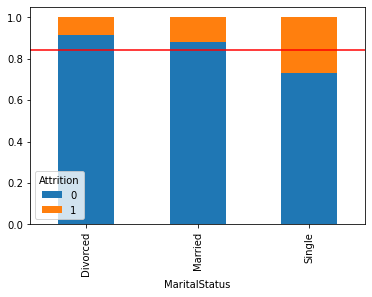

In [186]:
temp = pd.crosstab(data[feature], data[target], normalize = 'index')
print(temp)

temp.plot.bar(stacked = True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

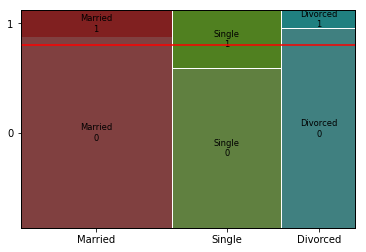

In [187]:
mosaic(data, [feature, target])
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 그래프로 살펴보니, MaritalStatus(결혼상태 범주)에 따라 이직여부가 차이가 있다.

③ 가설검정(카이제곱검정)

In [188]:
# 먼저 집계
table = pd.crosstab(data[feature], data[target])
print('교차표\n', table)
print('='*50)

# 카이제곱검정
result = spst.chi2_contingency(table)
print("카이제곱통계량 : {}".format(result[0]))
print('p-value : {}'.format(result[1]))
print('자유도 : {}'.format(result[2]))
print('기대빈도 :\n {}'.format(result[3]))

교차표
 Attrition        0    1
MaritalStatus          
Divorced       253   23
Married        501   69
Single         296  108
카이제곱통계량 : 53.12935546374186
p-value : 2.9047385436211595e-12
자유도 : 2
기대빈도 :
 [[231.84  44.16]
 [478.8   91.2 ]
 [339.36  64.64]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> p-value가 0.05보다 작으므로, MaritalStatus(결혼상태 범주)와 Attrition(이직여부)는 관련이 있다. (강한 관계)

> 결혼을 하면 책임감이 필요로 하기 때문에, MaritalStatus(결혼상태)가 Married면 Attrition(이직여부)가 낮을 것이다. 라는 주장은 맞았다.

#### 2) RelationshipSatisfaction(동료와의 관계) --> Attrition(이직여부)

In [189]:
feature = 'RelationshipSatisfaction'

① 교차표(pd.crosstab())

In [190]:
temp = pd.crosstab(data[target], data[feature], normalize = 'columns')
temp

RelationshipSatisfaction,1,2,3,4
Attrition,,,,
0,0.795652,0.841085,0.848866,0.857534
1,0.204348,0.158915,0.151134,0.142466


② 시각화( Stacked Bar, Mosaic)

Attrition                        0         1
RelationshipSatisfaction                    
1                         0.795652  0.204348
2                         0.841085  0.158915
3                         0.848866  0.151134
4                         0.857534  0.142466


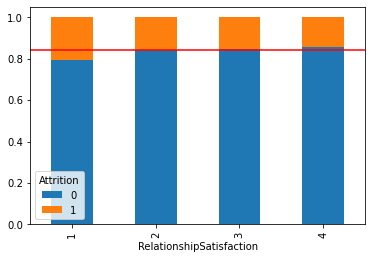

In [191]:
temp = pd.crosstab(data[feature], data[target], normalize = 'index')
print(temp)

temp.plot.bar(stacked = True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

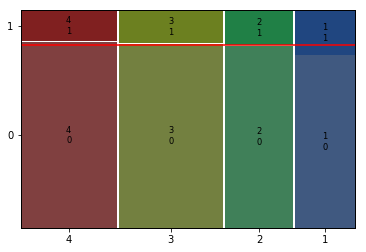

In [192]:
mosaic(data, [feature, target])
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 그래프로 살펴보니, RelationshipSatisfaction(동료와의 관계)와 Attrition(이직여부)는 관련이 크게 없어 보인다.

③ 가설검정(카이제곱검정)

In [193]:
# 먼저 집계
table = pd.crosstab(data[feature], data[target])
print('교차표\n', table)
print('='*50)

# 카이제곱검정
result = spst.chi2_contingency(table)
print("카이제곱통계량 : {}".format(result[0]))
print('p-value : {}'.format(result[1]))
print('자유도 : {}'.format(result[2]))
print('기대빈도 :\n {}'.format(result[3]))

교차표
 Attrition                   0   1
RelationshipSatisfaction         
1                         183  47
2                         217  41
3                         337  60
4                         313  52
카이제곱통계량 : 4.435126158518535
p-value : 0.2181503949975081
자유도 : 3
기대빈도 :
 [[193.2   36.8 ]
 [216.72  41.28]
 [333.48  63.52]
 [306.6   58.4 ]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> p-value가 0.05보다 크므로, RelationshipSatisfaction(동료와의 관계)와 Attrition(이직여부)는 관련이 없다. (관련 없음)

> RelationshipSatisfaction(동료와의 관계)가 좋을 수록 Attrition(이직여부)가 낮을 것이다. 라는 주장은 틀렸다.

#### 3) WorkLifeBalance(워라밸. 일-삶 균형도) --> Attrition(이직여부)

In [194]:
feature = 'WorkLifeBalance'

① 교차표(pd.crosstab())

In [195]:
temp = pd.crosstab(data[target], data[feature], normalize = 'columns')
temp

WorkLifeBalance,1,2,3,4
Attrition,,,,
0,0.710145,0.845118,0.855422,0.810219
1,0.289855,0.154882,0.144578,0.189781


② 시각화( Stacked Bar, Mosaic)

Attrition               0         1
WorkLifeBalance                    
1                0.710145  0.289855
2                0.845118  0.154882
3                0.855422  0.144578
4                0.810219  0.189781


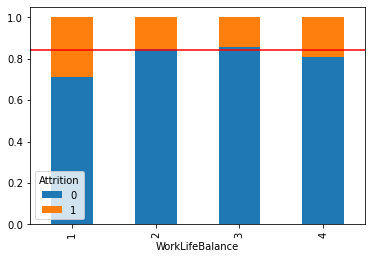

In [196]:
temp = pd.crosstab(data[feature], data[target], normalize = 'index')
print(temp)

temp.plot.bar(stacked = True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

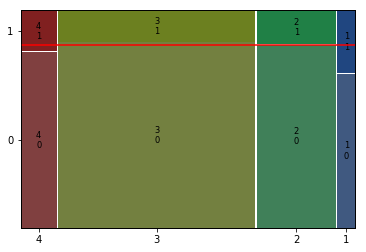

In [197]:
mosaic(data, [feature, target])
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 그래프로 살펴보니, WorkLifeBalance(워라밸. 일-삶 균형도)와 Attrition(이직여부)는 약하게 관련이 있어 보인다.

③ 가설검정(카이제곱검정)

In [198]:
# 먼저 집계
table = pd.crosstab(data[feature], data[target])
print('교차표\n', table)
print('='*50)

# 카이제곱검정
result = spst.chi2_contingency(table)
print("카이제곱통계량 : {}".format(result[0]))
print('p-value : {}'.format(result[1]))
print('자유도 : {}'.format(result[2]))
print('기대빈도 :\n {}'.format(result[3]))

교차표
 Attrition          0    1
WorkLifeBalance          
1                 49   20
2                251   46
3                639  108
4                111   26
카이제곱통계량 : 10.940810822342664
p-value : 0.012050277390233675
자유도 : 3
기대빈도 :
 [[ 57.96  11.04]
 [249.48  47.52]
 [627.48 119.52]
 [115.08  21.92]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> p-value가 0.05보다 작으므로, WorkLifeBalance(워라밸. 일-삶 균형도)와 Attrition(이직여부)는 관련이 있다. (약한 관계)

> WorkLifeBalance(워라밸. 일-삶 균형도)가 좋을 수록 Attrition(이직여부)가 낮을 것이다. 라는 주장은 맞다.

#### 4) OverTime(야근여부) --> Attrition(이직여부)

In [226]:
feature = 'OverTime'

① 교차표(pd.crosstab())

In [227]:
temp = pd.crosstab(data[target], data[feature], normalize = 'columns')
temp

OverTime,No,Yes
Attrition,,
0,0.896205,0.69774
1,0.103795,0.30226


② 시각화( Stacked Bar, Mosaic)

Attrition         0         1
OverTime                     
No         0.896205  0.103795
Yes        0.697740  0.302260


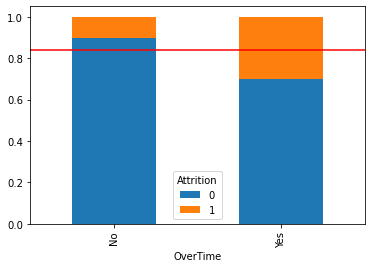

In [228]:
temp = pd.crosstab(data[feature], data[target], normalize = 'index')
print(temp)

temp.plot.bar(stacked = True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

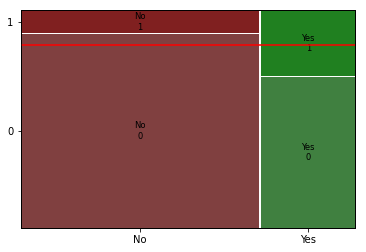

In [229]:
mosaic(data, [feature, target])
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 그래프로 살펴보니, OverTime(야근여부)에 따라 다른 결과를 보인다.  
야근을 하는 직원들이 야근을 하는 직원에 비해 이직을 많이 한다.

③ 가설검정(카이제곱검정)

In [230]:
# 먼저 집계
table = pd.crosstab(data[feature], data[target])
print('교차표\n', table)
print('='*50)

# 카이제곱검정
result = spst.chi2_contingency(table)
print("카이제곱통계량 : {}".format(result[0]))
print('p-value : {}'.format(result[1]))
print('자유도 : {}'.format(result[2]))
print('기대빈도 :\n {}'.format(result[3]))

교차표
 Attrition    0    1
OverTime           
No         803   93
Yes        247  107
카이제곱통계량 : 72.89605419432075
p-value : 1.366611233098835e-17
자유도 : 1
기대빈도 :
 [[752.64 143.36]
 [297.36  56.64]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> p-value가 0.05보다 작으므로, WorkLifeBalance(워라밸. 일-삶 균형도)와 Attrition(이직여부)는 관련이 있다. (약한 관계)

> OverTime(야근여부)가 있을 수록 Attrition(이직여부)가 높을 것이다. 라는 주장은 맞다.

> → 야근을 하는 직원과 야근을 하지않는 직원, 2 그룹으로 나누어 자세히 살펴볼 필요가 있다. 그래야 더 정확한 정보를 얻을 수 있지 않을까 기대한다.

### (2) 숫자형 Feature --> 범주형 Target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) DistanceFromHome(집-직장 거리) --> Attrition(이직여부)

In [199]:
feature = 'DistanceFromHome'

① 그래프 : histogram, densityplot

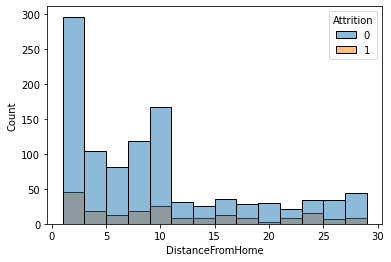

In [200]:
sns.histplot(x=feature, data = data, hue = target)
plt.show()

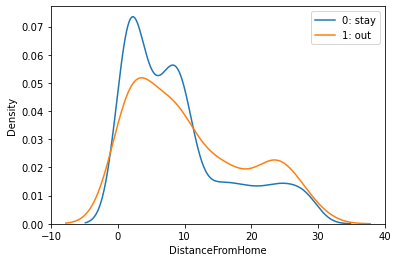

In [201]:
d0 = data.loc[data[target]==0]
d1 = data.loc[data[target]==1]

sns.kdeplot(x=feature, data = d0, label = '0: stay')
sns.kdeplot(x=feature, data = d1, label = '1: out')
plt.legend()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

>  DistanceFromHome(집-직장 거리) 와 Attrition(이직여부)는 관련이 커 보인다.

② 수치화 : 로지스틱회귀

In [202]:
model = sm.Logit(data[target], data[feature])
result = model.fit()
print('p-value: {}'.format(result.pvalues))

Optimization terminated successfully.
         Current function value: 0.562055
         Iterations 6
p-value: DistanceFromHome    5.890702e-48
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> v-value가 0.05보다 작으므로, DistanceFromHome(집-직장 거리) 와 Attrition(이직여부)는 관련이 크다. (약한 관계)

> DistanceFromHome(집-직장 거리)가 가까울 수록 Attrition(이직여부)가 낮을 것이다. 라는 주장은 맞다.

#### 2) NumCompaniesWorked(입사 전 근무한 회사 수) --> Attrition(이직여부)

In [203]:
feature = 'NumCompaniesWorked'

① 그래프 : histogram, densityplot

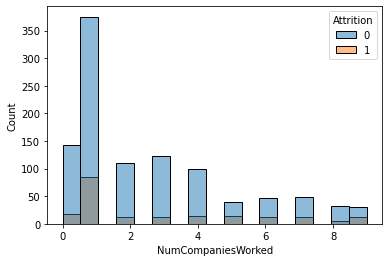

In [204]:
sns.histplot(x=feature, data = data, hue = target)
plt.show()

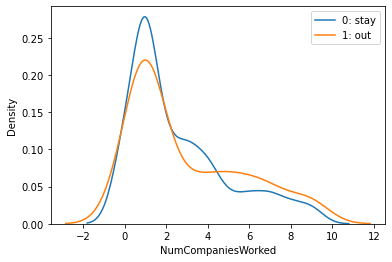

In [205]:
d0 = data.loc[data[target]==0]
d1 = data.loc[data[target]==1]

sns.kdeplot(x=feature, data = d0, label = '0: stay')
sns.kdeplot(x=feature, data = d1, label = '1: out')
plt.legend()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

>  NumCompaniesWorked(입사 전 근무한 회사 수) 와 Attrition(이직여부)는 관련이 커 보인다.

② 수치화 : 로지스틱회귀

In [206]:
model = sm.Logit(data[target], data[feature])
result = model.fit()
print('p-value: {}'.format(result.pvalues))

Optimization terminated successfully.
         Current function value: 0.564409
         Iterations 6
p-value: NumCompaniesWorked    7.457295e-46
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> p-value가 0.05보다 작으므로, NumCompaniesWorked(입사 전 근무한 회사 수) 와 Attrition(이직여부)는 관련이 크다. (강한 관계)

> DistanceFromHome(집-직장 거리)가 가까울 수록 Attrition(이직여부)가 낮을 것이다. 라는 주장은 맞다.

#### 3) PercentSalaryHike(전년대비 급여인상율) --> Attrition(이직여부)

In [207]:
feature = 'PercentSalaryHike'

① 그래프 : histogram, densityplot

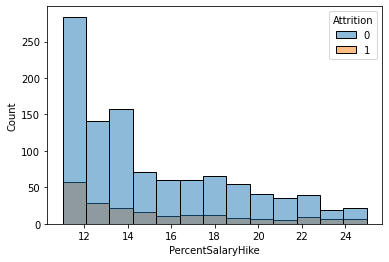

In [208]:
sns.histplot(x=feature, data = data, hue = target)
plt.show()

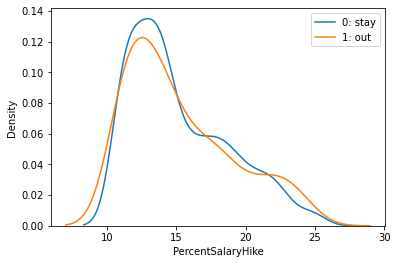

In [209]:
d0 = data.loc[data[target]==0]
d1 = data.loc[data[target]==1]

sns.kdeplot(x=feature, data = d0, label = '0: stay')
sns.kdeplot(x=feature, data = d1, label = '1: out')
plt.legend()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

>  PercentSalaryHike(전년대비 급여인상율) 와 Attrition(이직여부)는 관련이 커 보인다.

② 수치화 : 로지스틱회귀

In [210]:
model = sm.Logit(data[target], data[feature])
result = model.fit()
print('p-value: {}'.format(result.pvalues))

Optimization terminated successfully.
         Current function value: 0.450230
         Iterations 5
p-value: PercentSalaryHike    3.979995e-95
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> p-value가 0.05보다 작으므로, PercentSalaryHike(전년대비 급여인상율) 와 Attrition(이직여부)는 관련이 크다. (강한 관계)

> PercentSalaryHike(전년대비 급여인상율)이 높을 수록 Attrition(이직여부)가 낮을 것이다. 라는 주장은 맞다.

#### 4) TotalWorkingYears(총 경력 연수) --> Attrition(이직여부)

In [211]:
feature = 'TotalWorkingYears'

① 그래프 : histogram, densityplot

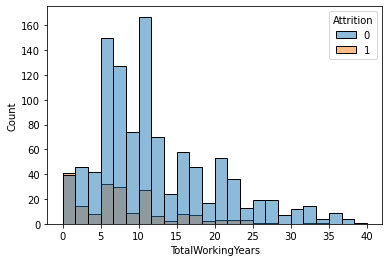

In [212]:
sns.histplot(x=feature, data = data, hue = target)
plt.show()

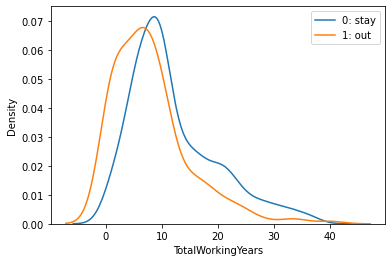

In [213]:
d0 = data.loc[data[target]==0]
d1 = data.loc[data[target]==1]

sns.kdeplot(x=feature, data = d0, label = '0: stay')
sns.kdeplot(x=feature, data = d1, label = '1: out')
plt.legend()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

>  PercentSalaryHike(전년대비 급여인상율) 와 Attrition(이직여부)는 관련이 있어 보인다.

② 수치화 : 로지스틱회귀

In [214]:
model = sm.Logit(data[target], data[feature])
result = model.fit()
print('p-value: {}'.format(result.pvalues))

Optimization terminated successfully.
         Current function value: 0.432906
         Iterations 6
p-value: TotalWorkingYears    1.867338e-74
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> p-value가 0.05보다 작으므로, TotalWorkingYears(총 경력 연수) 와 Attrition(이직여부)는 관련이 크다. (강한 관계)

> TotalWorkingYears(총 경력 연수)이 높을 수록 Attrition(이직여부)가 낮을 것이다. 라는 주장은 맞다.

#### 5) MonthlyIncome(월급)--> Attrition(이직여부)

In [215]:
feature = 'MonthlyIncome'

① 그래프 : histogram, densityplot

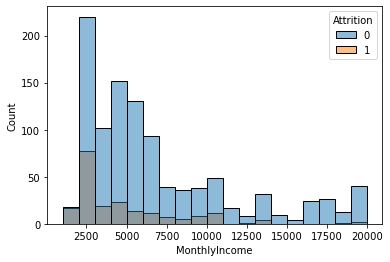

In [216]:
sns.histplot(x=feature, data = data, hue = target)
plt.show()

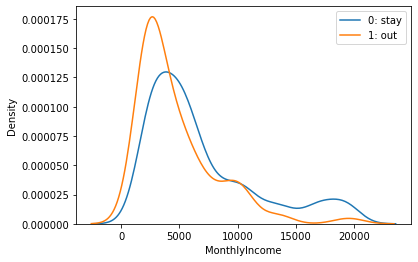

In [217]:
d0 = data.loc[data[target]==0]
d1 = data.loc[data[target]==1]

sns.kdeplot(x=feature, data = d0, label = '0: stay')
sns.kdeplot(x=feature, data = d1, label = '1: out')
plt.legend()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

>  MonthlyIncome(월급) 과 Attrition(이직여부)는 관련이 있어 보인다.

② 수치화 : 로지스틱회귀

In [218]:
model = sm.Logit(data[target], data[feature])
result = model.fit()
print('p-value: {}'.format(result.pvalues))

Optimization terminated successfully.
         Current function value: 0.437401
         Iterations 6
p-value: MonthlyIncome    1.922717e-71
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> p-value가 0.05보다 작으므로, MonthlyIncome(월급) 과 Attrition(이직여부)는 관련이 크다. (강한 관계)

> MonthlyIncome(월급)이 높을 수록 Attrition(이직여부)가 낮고 강한 관계가 있을 것이다. 라는 주장은 맞다.

## 4.관계 정리

### 1) 강한관계의 변수

>  MaritalStatus(결혼상태), NumCompaniesWorked(입사 전 근무한 회사 수), PercentSalaryHike(전년대비 급여인상율), TotalWorkingYears(총 경력 연수), MonthlyIncome(월급) 

### 2) 약한관계의 변수

> WorkLifeBalance(워라밸. 일-삶 균형도), OverTime(야근여부)

### 3) 관계 없음

> RelationshipSatisfaction(동료와의 관계)

## 5.추가 분석

>  OverTime(야근여부) feature을 좀 더 자세히 살펴 볼 필요가 있다.  
야근을 하는 직원과 야근을 하지않는 직원, 2 그룹으로 나누어 이직여부를 더 자세히 살펴 볼 필요성이 있다.